In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import pyproj
from matplotlib.ticker import FormatStrFormatter
# import utm
from tqdm import tqdm
import scipy


#### Velocity model

In [2]:
### Get the stations ID from original file

rawdata_Stations = pd.read_csv('data/stations/staInfo_df_DFS.csv')
rawdata_Stations = rawdata_Stations.rename(columns={'Unnamed: 0':'number'})
rawdata_Stations['number'] = rawdata_Stations['number'].astype(str)
all_station_IDs = rawdata_Stations['number'].values
all_station_IDs_bh = all_station_IDs[-8:]

In [4]:
#load 3d velocity
vel_3d = np.load('data/vel/Vel_3D_dxyz25m.npy')

#load the stations
stENZ_DFS = np.load('data/stations/stENZ_DFS.npy')
stENZ_DFS = stENZ_DFS[-8:]

## load the original field events 
ev_ENZ_2012_2013 = np.load('data/field/meq_locs/original/Original_events_2012_2013_ENZ_DFS.npy')
ev_ENZ_2014 = np.load('data/field/meq_locs/original/Original_events_2014_ENZ_DFS.npy')

print(vel_3d.shape)
print(stENZ_DFS.shape)
print(ev_ENZ_2012_2013.shape)
print(ev_ENZ_2014.shape)


(200, 356, 387)
(8, 3)
(149, 3)
(343, 3)


In [14]:
syn_EQs_loc = np.load('data/synthetic/synthetic_events_loc.npy')

In [15]:
clean_ev_2012_2013 = np.load('data/field/meq_locs/processed/newberry_2012_2013_event_locs.npy')
clean_ev_2014 = np.load('data/field/meq_locs/processed/newberry_2014_event_locs.npy')

print(clean_ev_2012_2013.shape)
print(clean_ev_2014.shape)

(144, 3)
(336, 3)


In [16]:
min_Easting = -5.101454601075733
max_Easting = 4.548545398924267
min_Northing = -4.271579885358922
max_Northing = 4.603420114641078
max_DFS = 4.975
min_DFS = 0

In [17]:
## relocate the wellbore
wb_coordinates = np.load('data/wellbore/wb_loc.npy')
wellhead = wb_coordinates[0]
wellhead_km = wellhead/1000
print(wellhead)
wellhead_all = np.tile(wellhead,(96,1)); print(wellhead.shape)
wellhead_all[:,2] = 0
norm_wb_coordinates = wb_coordinates - wellhead_all
print(norm_wb_coordinates[95])
print(norm_wb_coordinates.shape)

[-816.01291111 -197.17983303    0.        ]
(3,)
[ 529.55952  -16.88592 3008.28456]
(96, 3)


#### Fig. 3 

Text(0.0, 1.0, '(c) Aerial')

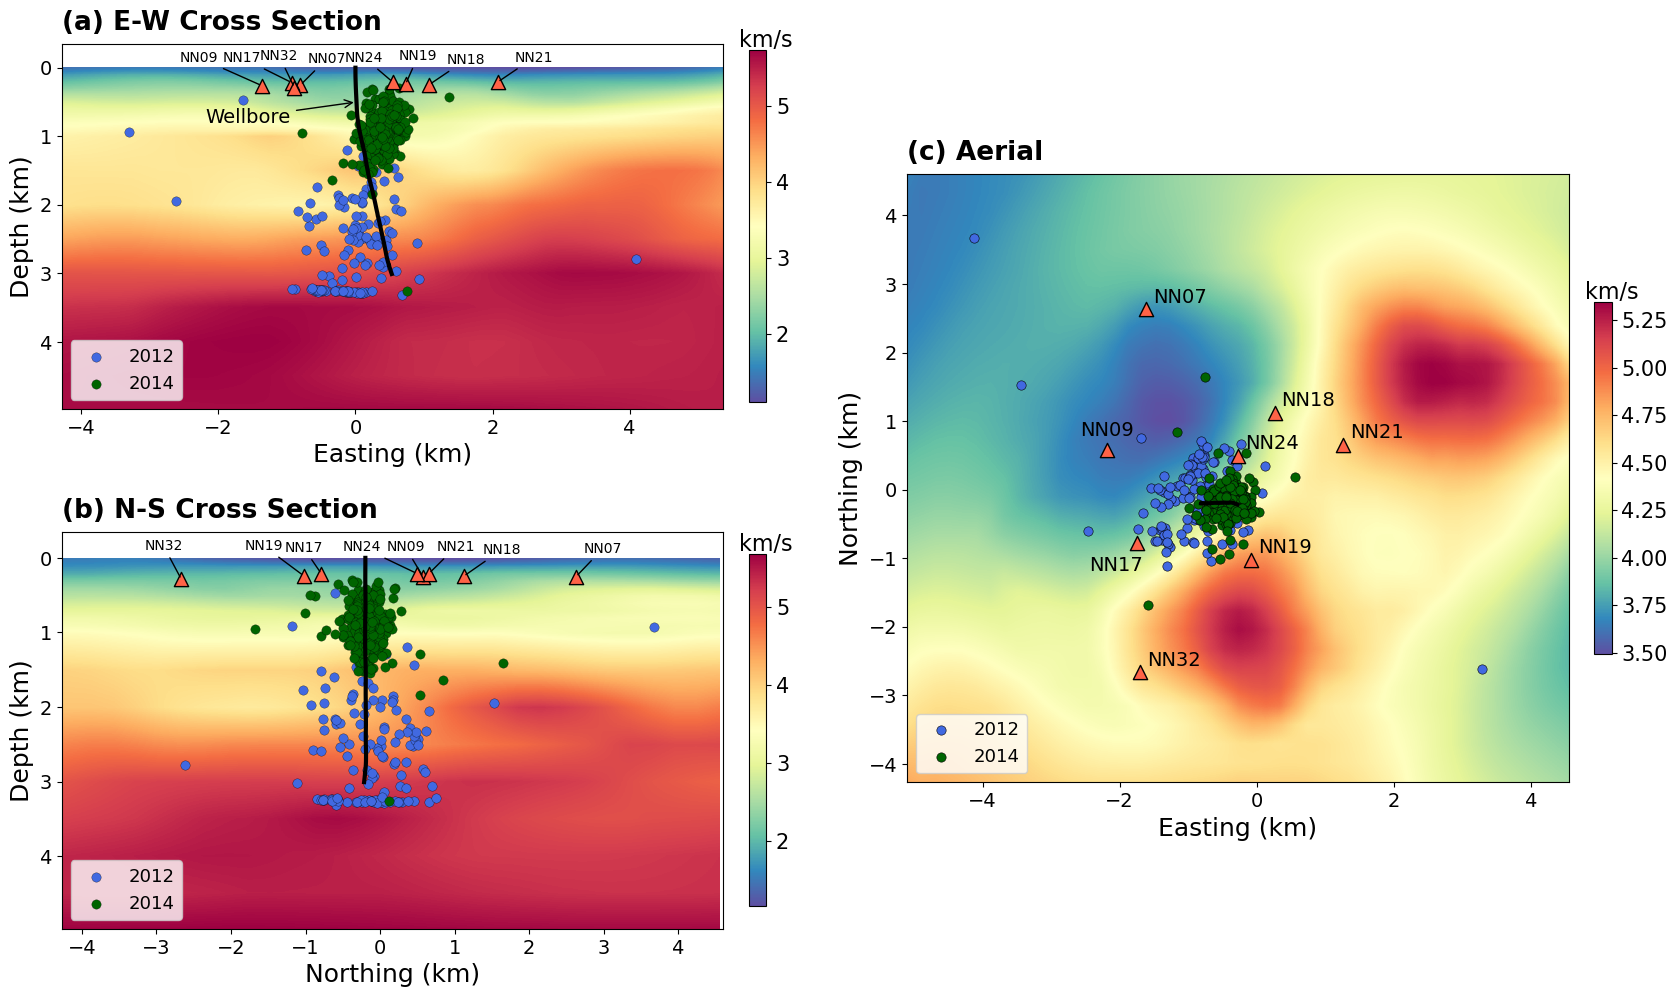

In [10]:
### PARAMS
matplotlib.rcParams['xtick.labelsize']=14
matplotlib.rcParams['ytick.labelsize']=14


### Figs 
fig = plt.figure(figsize=(20, 12))

###################################################################################### Easting #####################################################################
ax = plt.subplot2grid((2, 2), (0, 0))

#vel_3d has depth,northing,easting shape
slice_2D = vel_3d[:,160,:]
## Shift to wellbore
stENZ_DFS = np.load('data/stations/stENZ_DFS.npy')
stENZ_DFS = stENZ_DFS[-8:] #8,3
#relocate the wellbore coordinates 
stENZ_DFS_rl = stENZ_DFS.copy()
stENZ_DFS_rl[:,0] = stENZ_DFS_rl[:,0] - wellhead_km[0]
stENZ_DFS_rl[:,1] = stENZ_DFS_rl[:,1] - wellhead_km[1]


im = ax.imshow(slice_2D,cmap='Spectral_r',extent=(min_Easting-wellhead_km[0],max_Easting-wellhead_km[0],max_DFS,min_DFS))
cbar = fig.colorbar(im, ax=ax,fraction=0.025, pad=0.036)
cbar.ax.tick_params(labelsize=15)
cbar.ax.set_xlabel('km/s',fontsize=16)
cbar.ax.xaxis.set_label_coords(1,1.06)

##field events
ax.scatter(clean_ev_2012_2013[:,0]-wellhead_km[0],clean_ev_2012_2013[:,2],color='royalblue',s=45,label='2012',edgecolors='black',linewidth=0.2) 
ax.scatter(clean_ev_2014[:,0]-wellhead_km[0],clean_ev_2014[:,2],color='darkgreen',s=45,label='2014',edgecolors='black',linewidth=0.2) 
#stations
ax.scatter(stENZ_DFS_rl[:,0],stENZ_DFS_rl[:,2],s=105,color='tomato', marker='^',edgecolors='black',linewidth=1)
#Wellbore
ax.plot(norm_wb_coordinates[:,0]/1000,norm_wb_coordinates[:,2]/1000, linewidth=3,color='black')

ax.legend(loc='lower left',fontsize=13)
ax.set_xlabel('Easting (km)',fontsize=18)
ax.set_ylabel('Depth (km)',fontsize=18)
ax.set_ylim(max_DFS,-0.35)
ax.set_xlim(min_Easting-wellhead_km[0],max_Easting-wellhead_km[0])

fs = 10
i=0; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS_rl[i,0],stENZ_DFS_rl[i,2]),xytext=(stENZ_DFS_rl[i,0]+0.1,stENZ_DFS_rl[i,2]-0.32), #NN07
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=1; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS_rl[i,0],stENZ_DFS_rl[i,2]),xytext=(stENZ_DFS_rl[i,0]-1.2,stENZ_DFS_rl[i,2]-0.35), #NN09
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=2; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS_rl[i,0],stENZ_DFS_rl[i,2]),xytext=(stENZ_DFS_rl[i,0]-1.0,stENZ_DFS_rl[i,2]-0.3), #NN17
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=3; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS_rl[i,0],stENZ_DFS_rl[i,2]),xytext=(stENZ_DFS_rl[i,0]+0.25,stENZ_DFS_rl[i,2]-0.3), #NN18
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=4; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS_rl[i,0],stENZ_DFS_rl[i,2]),xytext=(stENZ_DFS_rl[i,0]-0.1,stENZ_DFS_rl[i,2]-0.35), #NN19
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=5; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS_rl[i,0],stENZ_DFS_rl[i,2]),xytext=(stENZ_DFS_rl[i,0]+0.25,stENZ_DFS_rl[i,2]-0.3), #NN21
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=6; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS_rl[i,0],stENZ_DFS_rl[i,2]),xytext=(stENZ_DFS_rl[i,0]-0.7,stENZ_DFS_rl[i,2]-0.30), #NN24
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=7; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS_rl[i,0],stENZ_DFS_rl[i,2]),xytext=(stENZ_DFS_rl[i,0]-0.5,stENZ_DFS_rl[i,2]-0.4), #NN32
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
ax.annotate('Wellbore',xy=(-0.8-wellhead_km[0],0.5),xytext=(-3-wellhead_km[0],0.8), arrowprops = dict(arrowstyle='->',facecolor ='black'),fontsize=14,color='black');

ax.set_title('(a) E-W Cross Section', weight='bold', fontsize=19,pad=10,loc='left')

###################################################################################### Northing #####################################################################
ax = plt.subplot2grid((2, 2), (1, 0))

#vel_3d has depth,northing,easting shape
slice_2D = vel_3d[:,:,190]
im = ax.imshow(slice_2D,cmap='Spectral_r',extent=(min_Easting,max_Easting,max_DFS,min_DFS))
cbar = fig.colorbar(im, ax=ax,fraction=0.025, pad=0.036)
cbar.ax.tick_params(labelsize=15)
cbar.ax.set_xlabel('km/s',fontsize=16)
cbar.ax.xaxis.set_label_coords(1,1.06)

##field events
ax.scatter(clean_ev_2012_2013[:,1],clean_ev_2012_2013[:,2],color='royalblue',s=45,label='2012',edgecolors='black',linewidth=0.2) 
ax.scatter(clean_ev_2014[:,1],clean_ev_2014[:,2],color='darkgreen',s=45,label='2014',edgecolors='black',linewidth=0.2) 
#stations
ax.scatter(stENZ_DFS[:,1],stENZ_DFS[:,2],s=105,color='tomato', marker='^',edgecolors='black',linewidth=1)
#wellbore
ax.plot(wb_coordinates[:,1]/1000,wb_coordinates[:,2]/1000, linewidth=3,color='black')

ax.legend(loc='lower left',fontsize=13)
ax.set_xlabel('Northing (km)',fontsize=18)
ax.set_ylabel('Depth (km)',fontsize=18)
ax.set_ylim(max_DFS,-0.35)
ax.set_xlim(min_Northing,max_Northing)

fs = 10
i=0; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS[i,1],stENZ_DFS[i,2]),xytext=(stENZ_DFS[i,1]+0.1,stENZ_DFS[i,2]-0.32), #NN07
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=1; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS[i,1],stENZ_DFS[i,2]),xytext=(stENZ_DFS[i,1]-0.5,stENZ_DFS[i,2]-0.35), #NN09
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=2; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS[i,1],stENZ_DFS[i,2]),xytext=(stENZ_DFS[i,1]-0.5,stENZ_DFS[i,2]-0.3), #NN17
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=3; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS[i,1],stENZ_DFS[i,2]),xytext=(stENZ_DFS[i,1]+0.25,stENZ_DFS[i,2]-0.3), #NN18
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=4; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS[i,1],stENZ_DFS[i,2]),xytext=(stENZ_DFS[i,1]-0.8,stENZ_DFS[i,2]-0.35), #NN19
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=5; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS[i,1],stENZ_DFS[i,2]),xytext=(stENZ_DFS[i,1]+0.1,stENZ_DFS[i,2]-0.3), #NN21
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=6; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS[i,1],stENZ_DFS[i,2]),xytext=(stENZ_DFS[i,1]-1,stENZ_DFS[i,2]-0.30), #NN24
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=7; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS[i,1],stENZ_DFS[i,2]),xytext=(stENZ_DFS[i,1]-0.5,stENZ_DFS[i,2]-0.4), #NN32
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');

ax.set_title('(b) N-S Cross Section', weight='bold', fontsize=19,pad=10,loc='left')

###################################################################################### Aerial #####################################################################
ax = plt.subplot2grid((2, 2), (0, 1), rowspan=2)

#vel_3d has depth,northing,easting shape
slice_2D = vel_3d[80,:,:]
im = ax.imshow(slice_2D,cmap='Spectral_r',extent=(min_Easting,max_Easting,min_Northing,max_Northing))
cbar = fig.colorbar(im, ax=ax,fraction=0.025, pad=0.036)
cbar.ax.tick_params(labelsize=15)
cbar.ax.set_xlabel('km/s',fontsize=16)
cbar.ax.xaxis.set_label_coords(1,1.06)

##field events
ax.scatter(clean_ev_2012_2013[:,0],clean_ev_2012_2013[:,1],color='royalblue',s=45,label='2012',edgecolors='black',linewidth=0.4) 
ax.scatter(clean_ev_2014[:,0],clean_ev_2014[:,1],color='darkgreen',s=45,label='2014',edgecolors='black',linewidth=0.4) 
#stations
ax.scatter(stENZ_DFS[:,0],stENZ_DFS[:,1],s=105,color='tomato', marker='^',edgecolors='black',linewidth=1)
#wellbore
ax.plot(wb_coordinates[:,0]/1000,wb_coordinates[:,1]/1000, linewidth=3,color='black')

ax.set_xlim(min_Easting,max_Easting)
ax.legend(loc='lower left',fontsize=13)
ax.set_xlabel('Easting (km)',fontsize=18)
ax.set_ylabel('Northing (km)',fontsize=18)

fs = 14
i=0; ax.text(stENZ_DFS[i,0]+0.1,stENZ_DFS[i,1]+0.1,'{}'.format(all_station_IDs_bh[i]),fontsize=fs) #NN07
i=1; ax.text(stENZ_DFS[i,0]-0.4,stENZ_DFS[i,1]+0.2,'{}'.format(all_station_IDs_bh[i]),fontsize=fs) #NN09
i=2; ax.text(stENZ_DFS[i,0]-0.7,stENZ_DFS[i,1]-0.4,'{}'.format(all_station_IDs_bh[i]),fontsize=fs) #NN17
i=3; ax.text(stENZ_DFS[i,0]+0.1,stENZ_DFS[i,1]+0.1,'{}'.format(all_station_IDs_bh[i]),fontsize=fs) #NN18
i=4; ax.text(stENZ_DFS[i,0]+0.1,stENZ_DFS[i,1]+0.1,'{}'.format(all_station_IDs_bh[i]),fontsize=fs) #NN19
i=5; ax.text(stENZ_DFS[i,0]+0.1,stENZ_DFS[i,1]+0.1,'{}'.format(all_station_IDs_bh[i]),fontsize=fs) #NN21
i=6; ax.text(stENZ_DFS[i,0]+0.1,stENZ_DFS[i,1]+0.1,'{}'.format(all_station_IDs_bh[i]),fontsize=fs) #NN24
i=7; ax.text(stENZ_DFS[i,0]+0.1,stENZ_DFS[i,1]+0.1,'{}'.format(all_station_IDs_bh[i]),fontsize=fs) #NN32

ax.set_title('(c) Aerial', weight='bold', fontsize=19,pad=10,loc='left')


# plt.savefig('Figures/3-VelCrossSection_ALL_Combined_2012_2014.jpg',bbox_inches='tight',dpi=300)

(200, 387)


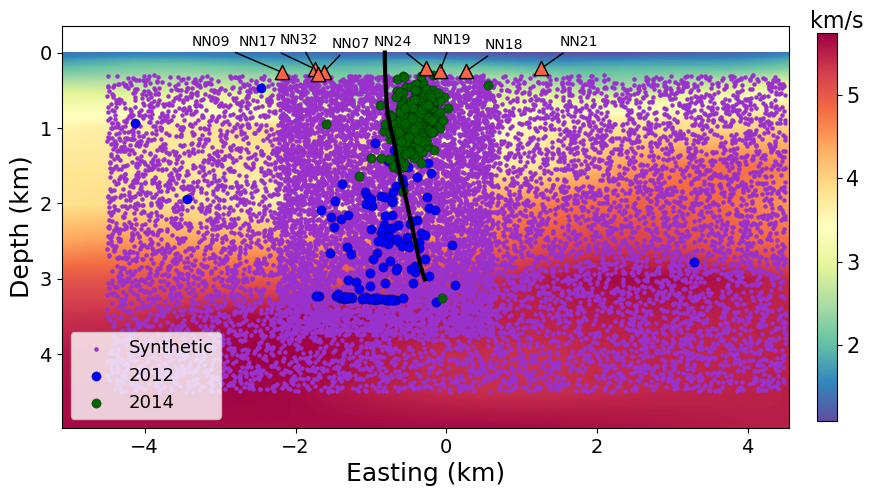

In [25]:
### Plot a Slice - all stations and data
matplotlib.rcParams['xtick.labelsize']=14
matplotlib.rcParams['ytick.labelsize']=14
wb_coordinates = np.load('data/wellbore/wb_loc.npy')

#vel_3d has depth,northing,easting shape

slice_2D = vel_3d[:,160,:]
print(slice_2D.shape)

fig = plt.figure(figsize=(10,8))
ax = plt.gca()
im = ax.imshow(slice_2D,cmap='Spectral_r',extent=(min_Easting,max_Easting,max_DFS,min_DFS))
cbar = fig.colorbar(im, ax=ax,fraction=0.025, pad=0.036)
cbar.ax.tick_params(labelsize=15)
cbar.ax.set_xlabel('km/s',fontsize=16)
cbar.ax.xaxis.set_label_coords(1,1.06)

# #artificial events - surrounding space
ax.scatter(syn_EQs_loc[:15000,0],syn_EQs_loc[:15000,2],color='darkorchid',s=5,label='Synthetic') 
# #artificial events - EGS region
# ax.scatter(syn_EQs_loc[9990:9990+5000,0],syn_EQs_loc[9990:9990+5000:,2],color='darkorchid',s=5) 

##field events
ax.scatter(clean_ev_2012_2013[:,0],clean_ev_2012_2013[:,2],color='blue',s=45,label='2012',edgecolors='black',linewidth=0.2) 
ax.scatter(clean_ev_2014[:,0],clean_ev_2014[:,2],color='darkgreen',s=45,label='2014',edgecolors='black',linewidth=0.2) 
#stations
ax.scatter(stENZ_DFS[:,0],stENZ_DFS[:,2],s=105,color='tomato', marker='^',edgecolors='black',linewidth=1)
#Wellbore
ax.plot(wb_coordinates[:,0]/1000,wb_coordinates[:,2]/1000, linewidth=3,color='black')


ax.legend(loc='lower left',fontsize=13)
ax.set_xlabel('Easting (km)',fontsize=18)
ax.set_ylabel('Depth (km)',fontsize=18)
ax.set_ylim(max_DFS,-0.35)
ax.set_xlim(min_Easting,max_Easting)

fs = 10
i=0; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS[i,0],stENZ_DFS[i,2]),xytext=(stENZ_DFS[i,0]+0.1,stENZ_DFS[i,2]-0.32), #NN07
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=1; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS[i,0],stENZ_DFS[i,2]),xytext=(stENZ_DFS[i,0]-1.2,stENZ_DFS[i,2]-0.35), #NN09
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=2; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS[i,0],stENZ_DFS[i,2]),xytext=(stENZ_DFS[i,0]-1.0,stENZ_DFS[i,2]-0.3), #NN17
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=3; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS[i,0],stENZ_DFS[i,2]),xytext=(stENZ_DFS[i,0]+0.25,stENZ_DFS[i,2]-0.3), #NN18
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=4; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS[i,0],stENZ_DFS[i,2]),xytext=(stENZ_DFS[i,0]-0.1,stENZ_DFS[i,2]-0.35), #NN19
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=5; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS[i,0],stENZ_DFS[i,2]),xytext=(stENZ_DFS[i,0]+0.25,stENZ_DFS[i,2]-0.3), #NN21
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=6; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS[i,0],stENZ_DFS[i,2]),xytext=(stENZ_DFS[i,0]-0.7,stENZ_DFS[i,2]-0.30), #NN24
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
i=7; ax.annotate('{}'.format(all_station_IDs_bh[i]),xy=(stENZ_DFS[i,0],stENZ_DFS[i,2]),xytext=(stENZ_DFS[i,0]-0.5,stENZ_DFS[i,2]-0.4), #NN32
                arrowprops = dict(arrowstyle='-',facecolor ='black'),fontsize=fs,color='black');
# plt.savefig('Figures/4-VelCrossSection_Field_Synthetic_Overlay_2012_2014.jpg',bbox_inches='tight',dpi=300)